# Stats - relative anomalies, annual

$$
z_{anomaly} = \frac{1}{30} \displaystyle\sum_{y=1}^{30}
\left(\frac{\bar{x}_y - \bar{x}_{hist}}{\bar{x}_{hist}} \times 100\right)\ (\%)
$$

- calculate annual means (or seasonal means for each year)
- calculate the historical mean from the annual means
- normalise
- interannual reduction
- ensemble reduction

In [7]:
import importlib
import climag.climag as cplt
import geopandas as gpd
import os
import numpy as np

In [2]:
# mask for offshore areas
ie_bbox = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="ne_10m_land_2157_IE_BBOX_DIFF",
)
# mask for non-pasture areas
mask = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="CLC_2018_MASK_PASTURE_2157_IE",
)

In [17]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

## EURO-CORDEX

In [3]:
ds_ec = cplt.load_all_data("EURO-CORDEX")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [4]:
ds_ec_norm = cplt.calc_normalised_relative(ds_ec, skipna=True)

In [5]:
# get interannual mean, and then the ensemble mean
ds_ec_norm_reduced = ds_ec_norm.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

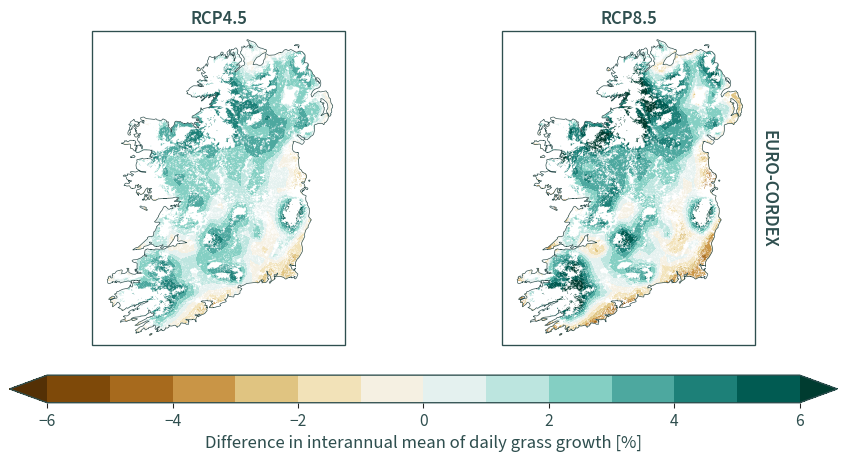

In [18]:
cplt.plot_stats(ds_ec_norm_reduced.sel(exp=["rcp45", "rcp85"]).assign_coords(ds="EURO-CORDEX").expand_dims(dim="ds")["gro"], cplt.projection_eurocordex, mask, ie_bbox, label="Difference in interannual mean of daily grass growth [%]", levels=np.arange(-6, 6 + 1, 1), row="ds")

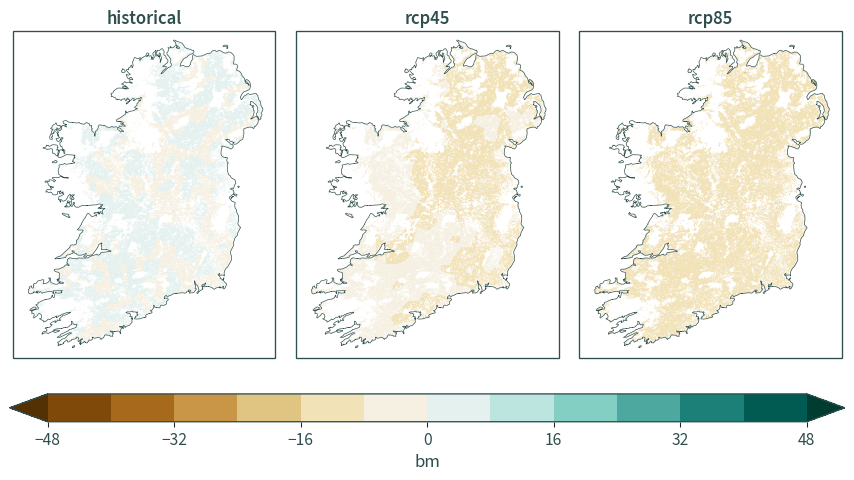

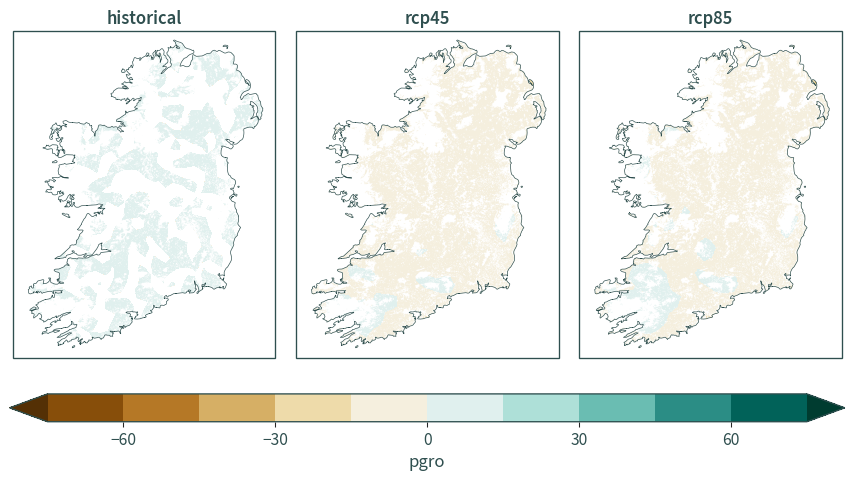

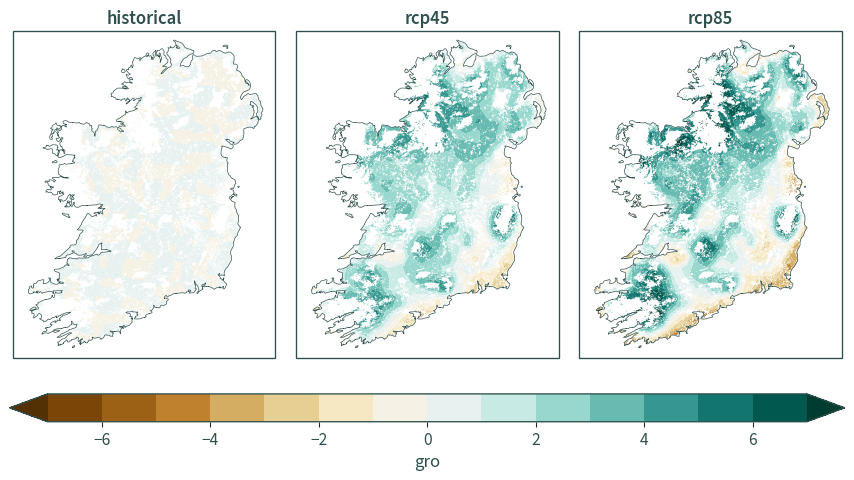

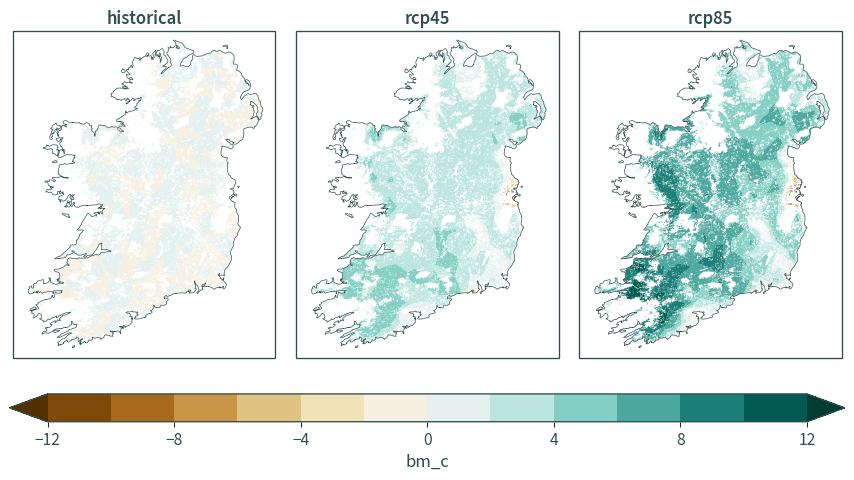

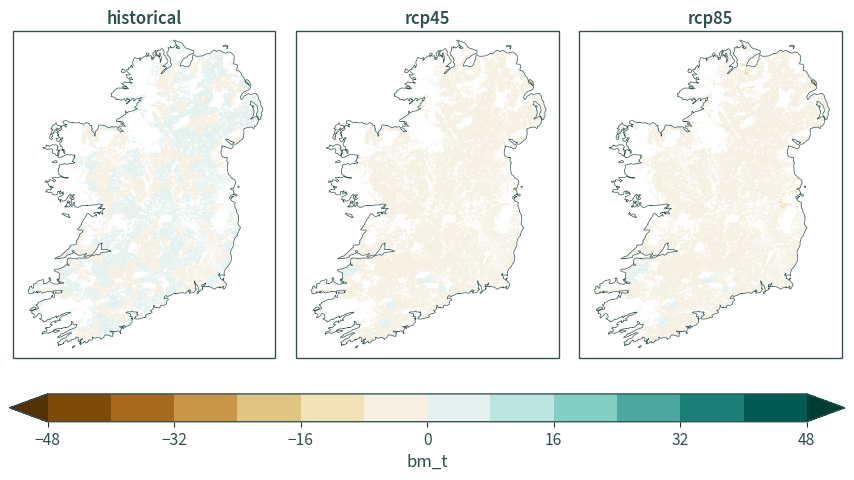

In [22]:
cplt.plot_stats(ds_ec_norm_reduced, cplt.projection_eurocordex, mask, ie_bbox)

## HiResIreland

In [19]:
ds_hr = cplt.load_all_data("HiResIreland")

In [20]:
ds_hr_norm = cplt.calc_normalised_relative(ds_hr, skipna=True)

In [21]:
ds_hr_norm_reduced = ds_hr_norm.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

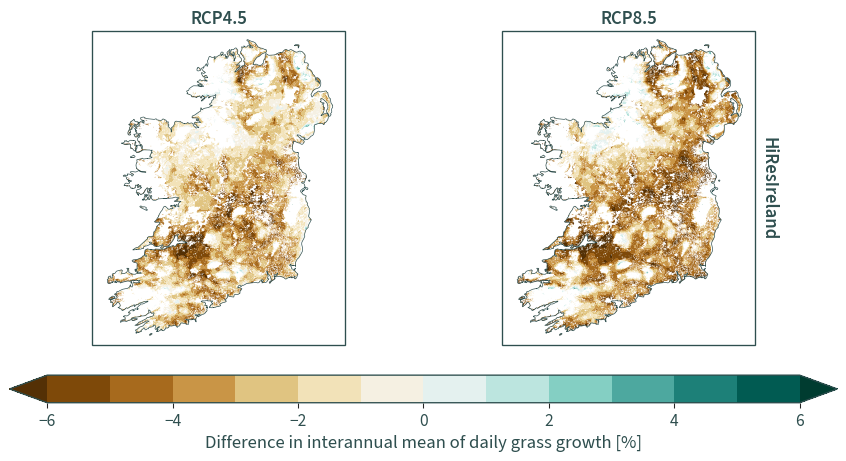

In [23]:
cplt.plot_stats(ds_hr_norm_reduced.sel(exp=["rcp45", "rcp85"]).assign_coords(ds="HiResIreland").expand_dims(dim="ds")["gro"], cplt.projection_hiresireland, mask, ie_bbox, label="Difference in interannual mean of daily grass growth [%]", levels=np.arange(-6, 6 + 1, 1), row="ds")

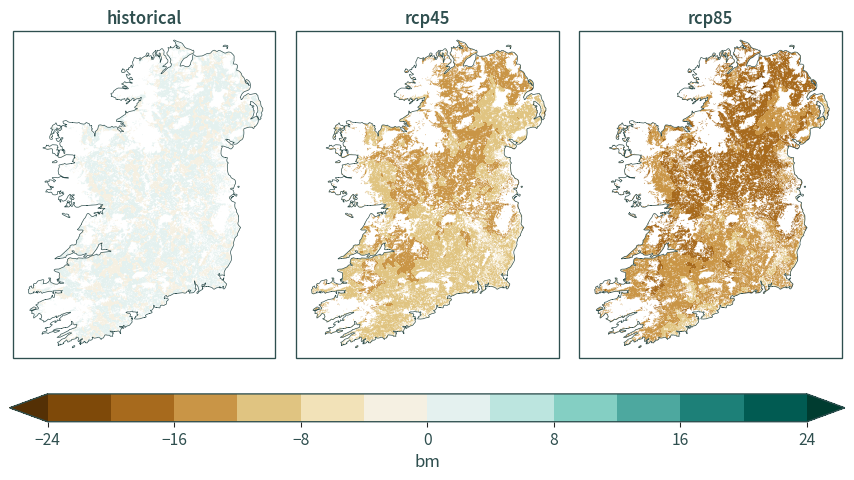

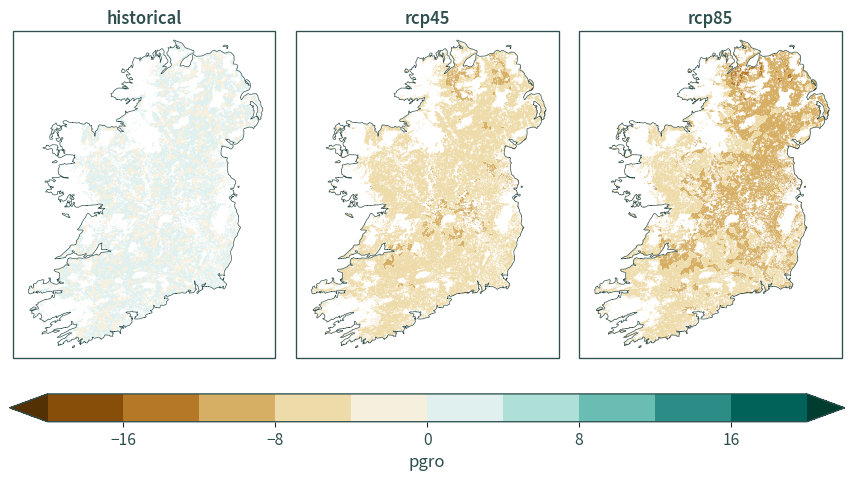

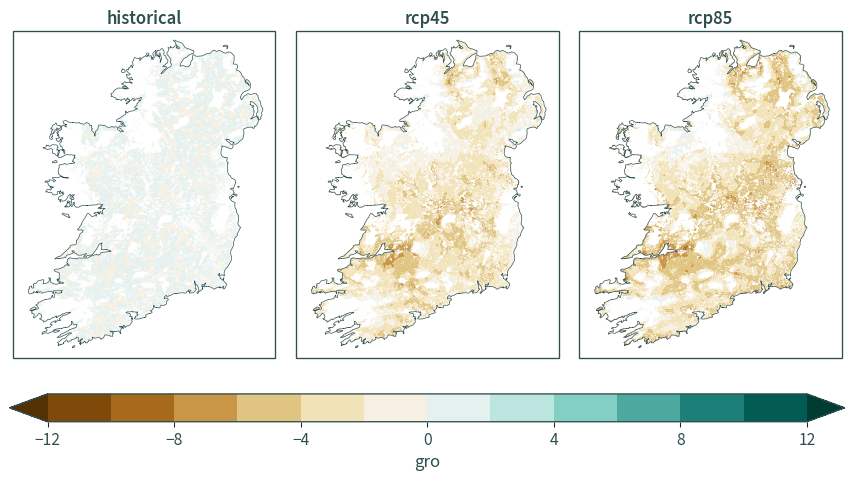

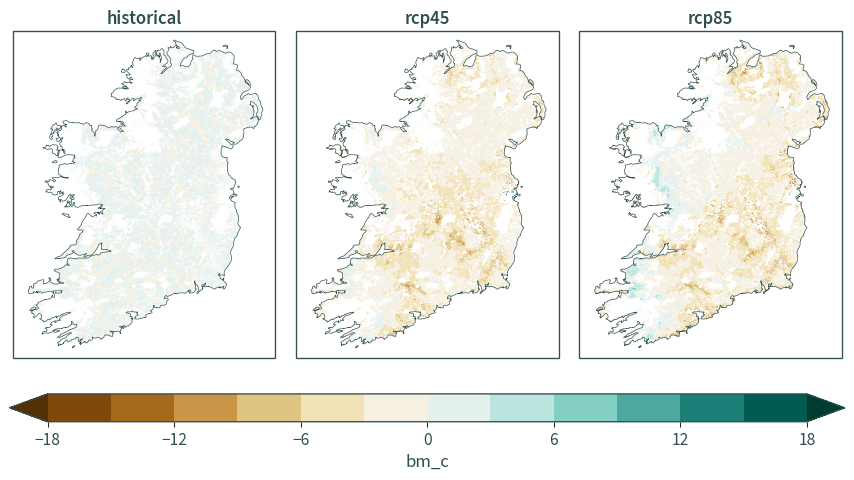

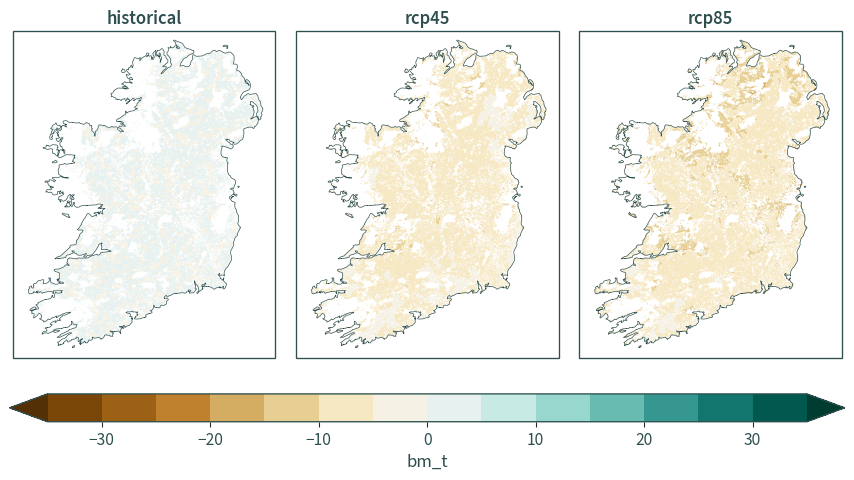

In [39]:
cplt.plot_stats(ds_hr_norm_reduced, cplt.projection_hiresireland, mask, ie_bbox)